## Predicting Bank Customer Churn
<b> Client </b> <br>
The client is a renown bank that offers various banking products in the highly competitive consumer banking sector. 

<b> Current Business Problem: </b> <br>
* Increasing customer churn rate in recent years
* High acquisition costs - customer acquisition costs up to 5 times more than retention costs. <u>[(source)](https://www.forbes.com/councils/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/)</u>
* Highly competitive banking sector <br>

<b> Expected deliverables of this project are as follows: </b> 
* To understand the variables that impact the churn rate
* To find out why do customers churn
* Based on the findings, suggest what can the bank do to reduce the churn rate
* Prediction of a customer leavin g

Note :
* This dataset was obtained from Kaggle <u>[Bank Customer Churn Prediction Dataset](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data)</u>.
* Credits to <u>[Venkatesh Tantravahi](https://www.kaggle.com/venkateshtantravahi)</u> (Kaggle contributor) for some of the analysis strategies used here. 

<b>About the dataset:</b>

The dataset includes the following attributes:

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

## 1. Loading the necessary libraries and the dataset 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load dataset
df = pd.read_csv('Churn_Modelling.csv')

# Preview the first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### Dataset Overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [8]:
# descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
df.shape

(10002, 14)

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


<b>Comments:</b> 
* There are 14 columns & 10002 records in this dataset<br>
* Observation of the first few rows of data from .head() show that the first 3 columns (Customer ID, RowNumber & Surname) seem to be redundant and do not contain much useful information for the purpose of this project. Hence suggest to drop these columns ahead of the model training.
* As one of the deliverables of this project is to predict the probability of a customer churning, we will use 'Exited' as the target feature.

### Target Variable - Exited (0 = no, 1 = yes)
Here, we will look into the distribution of the target variable.

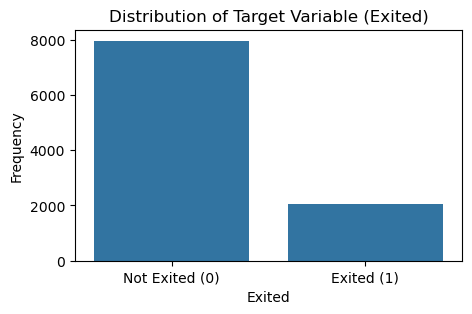

In [13]:
# Count the occurrences of each class in the target variable
class_counts = df['Exited'].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(5, 3))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Target Variable (Exited)')
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Exited (0)', 'Exited (1)'])  
plt.show()

In [14]:
# Print the percentage of each class
for i in range(len(class_counts)):
    percent = (class_counts[i] / len(df['Exited'])) * 100
    print(f"Class {i} Percentage: {percent:.1f}%")


Class 0 Percentage: 79.6%
Class 1 Percentage: 20.4%


#### Class Imbalance
There is class imbalance in the target variable with a large majority representing customers who did not churn (79.6%) vs a small number representing customers who churned (20.4%). This imbalance will affect the performance of model, where the outcome may be biased towards the majority class (customers who did not churn). This will be misleading and will affect the expected prediction. Therefore we will need to fix this imbalance during the modeling stage.

### Visualisation <br>
Here, through visualisation, we aim to better understand or uncover any relationships or trends that we can extract from our dataset. In particular, these are the steps: 

i) Exploring Relationships Between Variables >> How do the variables affect one another? Is there multicolinearity in the data? <br>
ii) Visualising Distribution of Variables >> Understand the distribution of the data - How are the data points spread across the range? <br>
iii) Visualising Correlation Between Features and Target >> To identify potential predictors by spotting the correlation between the target and the other variables. <br>

NOTE: As identified earlier, there are 3 columns which are redundant. Hence, they will not be included in the visualisation analysis here.

In [17]:
# Import neccessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

#### i) Exploring Relationships Between Variables

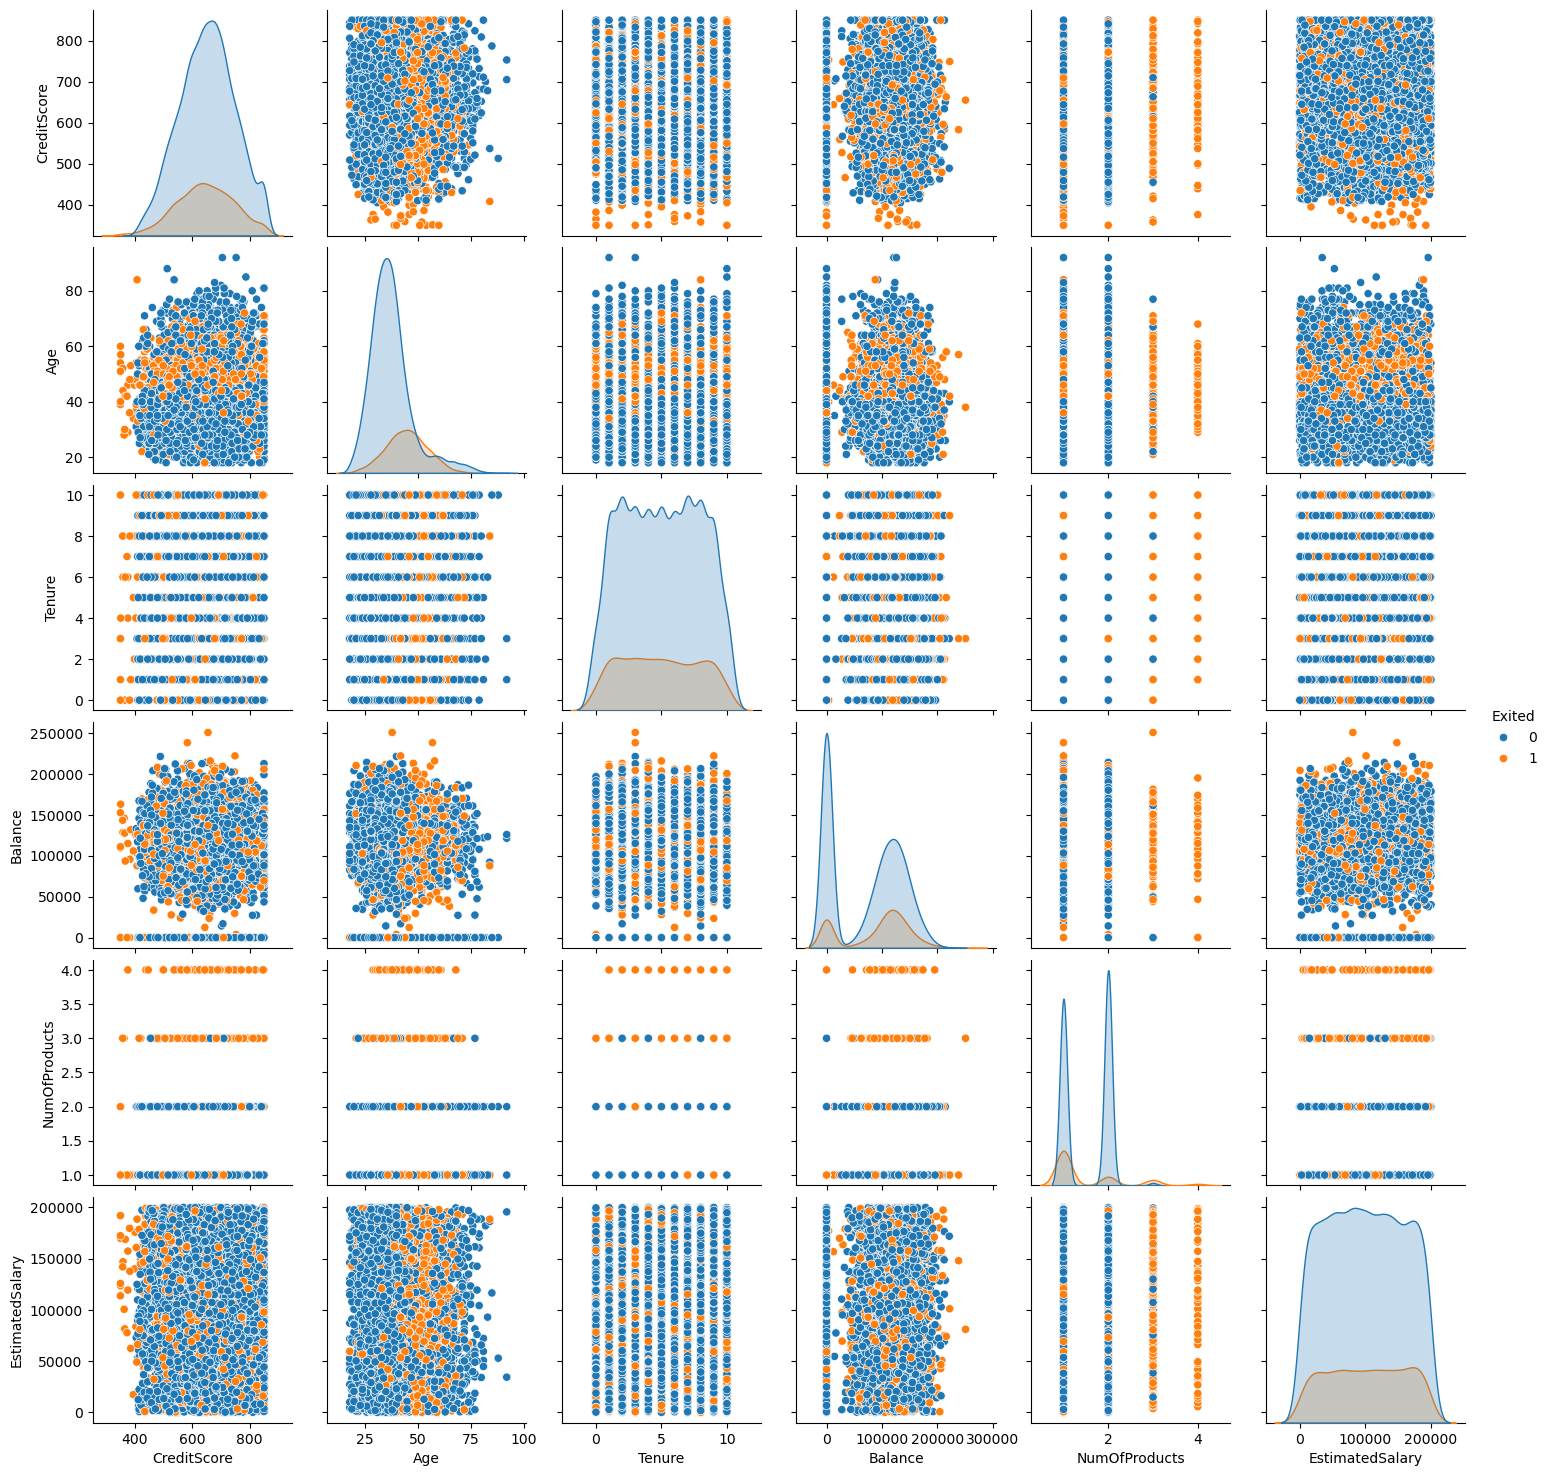

In [19]:
# plotting visualisattion for numerical variables
num_col_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

sns.pairplot(df[num_col_to_plot], hue='Exited', diag_kind='kde')
plt.show()

<b> Credit Score: :</b>
* The distribution  of Credit Score seem to follow a normal distribution without any skewness.
* Majority of customers with low credit scores (approximately 450 & below) have exited, implying that customers with low credit scores seem to show a higher tendency to leave the bank. <br>

<b> Age: </b>
* In general, the age group of customers who are still with the bank is younger than those who have left. 
* Majority of customers aged 50 & below tend to remain with the bank but the older customers show an increased tendency to leave, suggesting that age (above 50) might be a potential predictor of churn. <br>

<b> Tenure with the bank: </b>
* The chart does not show any clear correlation between tenure and customer churn status.<br>

<b> Balance: </b>
* There is a large majority of customers with zero balance who did not exit.
* The distribution of the balance of customers are bimodal with uneven spread. The distribution of balance for customers who churned is wider and flatter, indicating more variability among those customers. This can lead to poor model performance.  <br>

<b> Number of Products: </b>
* Majority of customers who exited used 3 or 4 products of the bank, while majority of customers who remained used 2 or less products of the bank.
* Most customers (both exited & did not exit) are users of only 1 or 2 of the bank's product. A small number of them are use 4, but retention rate is very low for this segment of customers.<br>

<b> Estimated Salary: </b>
* There does not seem to be any correlation in estimated salary and customer churn status.
* The estimated salary of the customers are evenly spread out across a wide range.

<b>** Conclusion:</b> <br>
* There is no visual evidencce indicating any strong correlations between these independent features suggesting low risk of multicollinearity which may affect the model later.


### Visualising Distribution of Numerical Variables

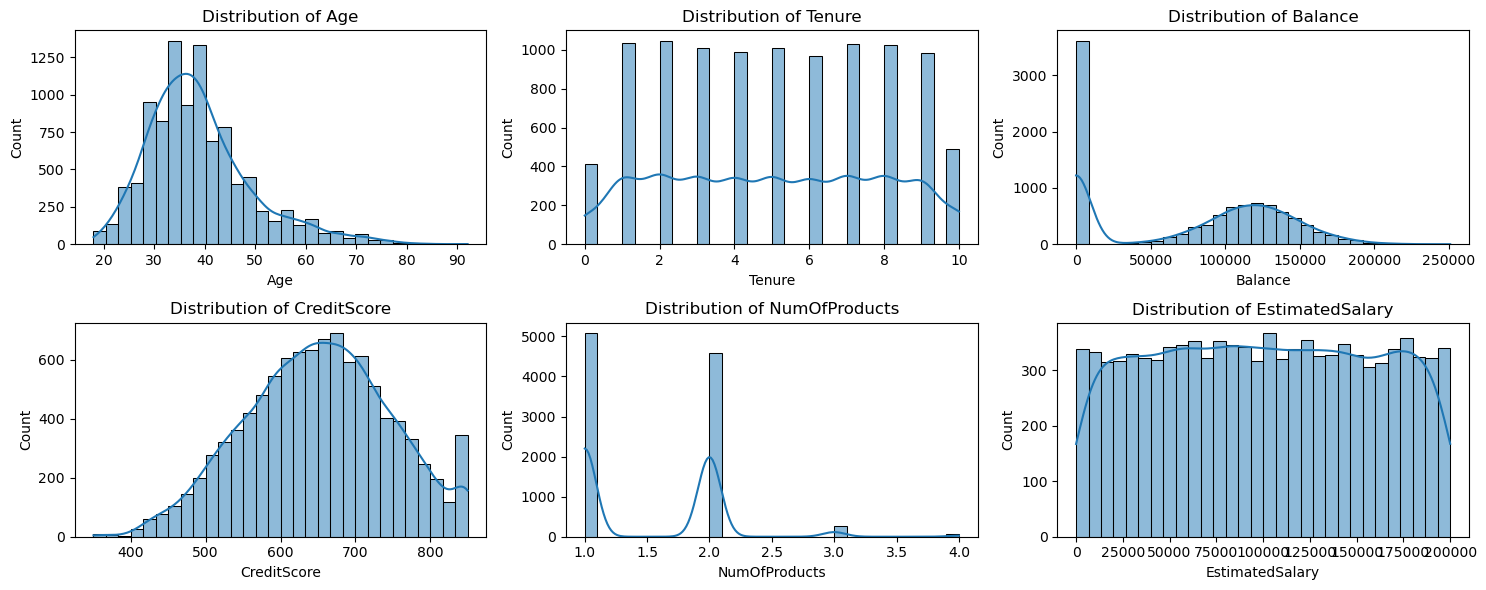

In [23]:
# Plotting distribution of numerical columns
numerical_columns = ['Age','Tenure','Balance','CreditScore', 'NumOfProducts', 'EstimatedSalary']

# plotting the subplot
plt.figure(figsize=(15, 3 * 2))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<b> Comments </b>
* <b>Age:</b> The histogram of Age is right-skewed suggesting majority of the customers are younger. Average age of customers is 38.9 years with only 25% of the customers are above the age of 44 years old.
* <b>Tenure:</b> Customer's tenure with the bank is evenly spread out across 1 to 9 years. However, there is a sharp dip in number of customers with tenure of 10 years and 0 years. This implies that there are fewer new customers and a dip in number of older customers.
* <b>Balance:</b> A sizeable portion of the bank's customers hold zero balance in their accounts.
* <b>Credit score:</b> The distribution of credit scores follows a normal distribution where customers have credit score of 650 on average.
* <b>Number of Products:</b> As seen in the previous pairplot, it is very visibly evident that large majority (75%) of the customers do not use more than 2 of the bank's products, this implies very low interaction between the customer and the bank.
* <b>Estimated Salary</b>: The estimated salaries of customers are fairly evenly spread out across the range without any skew, with the average at 100099.

### Visualising Distribution of Categorical Variables

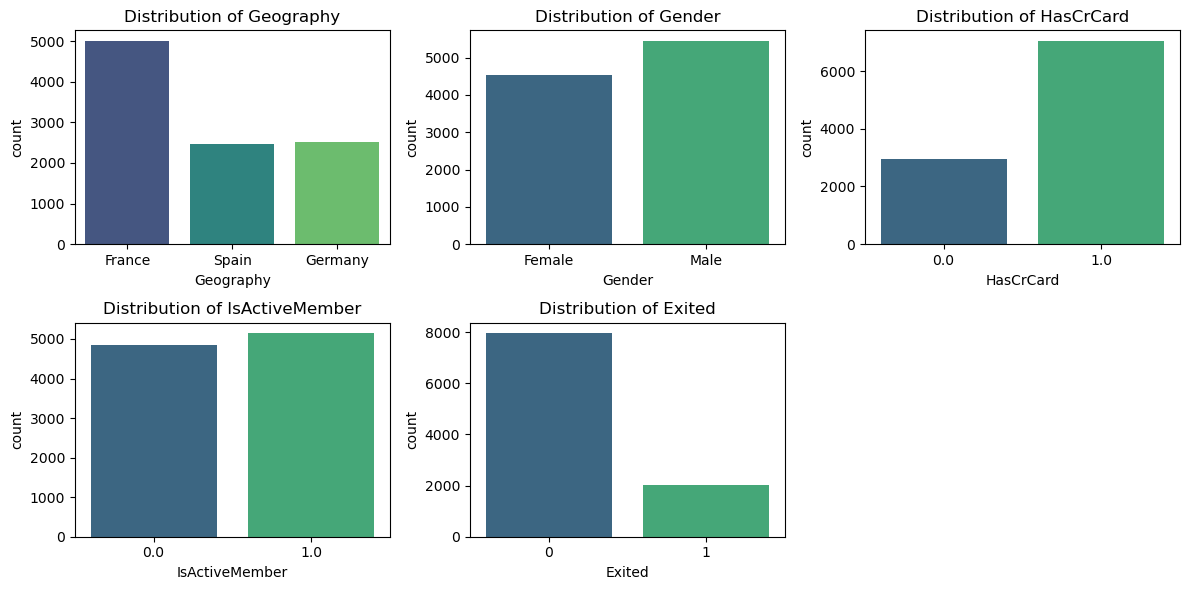

In [27]:
# For categorical variables
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']

# Create subplots
plt.figure(figsize=(12, 3 * 2))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, palette="viridis", legend=False)
    plt.title(f'Distribution of {column}')
        
plt.tight_layout()
plt.show()


* <b>Geography:</b> There is big difference in number of customers from France, while customers from Spain & Germany are approximately in equal proportion. This is a point to note as the model might be biased towards the majority ie, the French customers, thus affecting the performance. However, if there is little or correlation with the target variable, we may not need to address this.<br>

* <b>Gender: </b>There are slightly more male customers than female in the dataset, but the difference is not significant and not likely to affect the model. Hence, no further action required.<br>

* <b>Credit Card Ownership (HasCrCard, 0 = no, 1 = yes): </b>There is also imbalance in the data for customers' credit card ownership. However we will need to establish if there is correlation with the target variable. If there is little/no correlation, this imbalance is not likely to affect the model performance and no action is needed.

* <b>Active/Inactive Member Status (IsActiveMember, 0 = no, 1 = yes): </b>Distribution between active & inactive members are relatively even, hence no further action required.

* <b>Exited (0 = no, 1 = yes): </b>There is a big imbalance between number of customers who exited & those who did not. As this is the target variable, this imbalance will affect the performance of the model later. Hence, we will need to address this class imbalnce before training the model.

### Visualising Correlation Between Features and Target 

As there is a mix of <b>numerical</b> and <b>categorical</b> features, we have to adopt different approaches for each to understand the correlation with the target variable. <br>

Objectives of this step:
* To analyse correlation between features and target to identify potential predictors for te model training.
* To establish if intervention is necessary for the imbalanced features ('Geography','HasCrCard' & 'Exited') identified earlier. No action will be needed if there is little/no evidence of correlation with target.

<b> Plotting visualisation to analyse relationship betwwen numerical features and target variable - "Exited":</b>

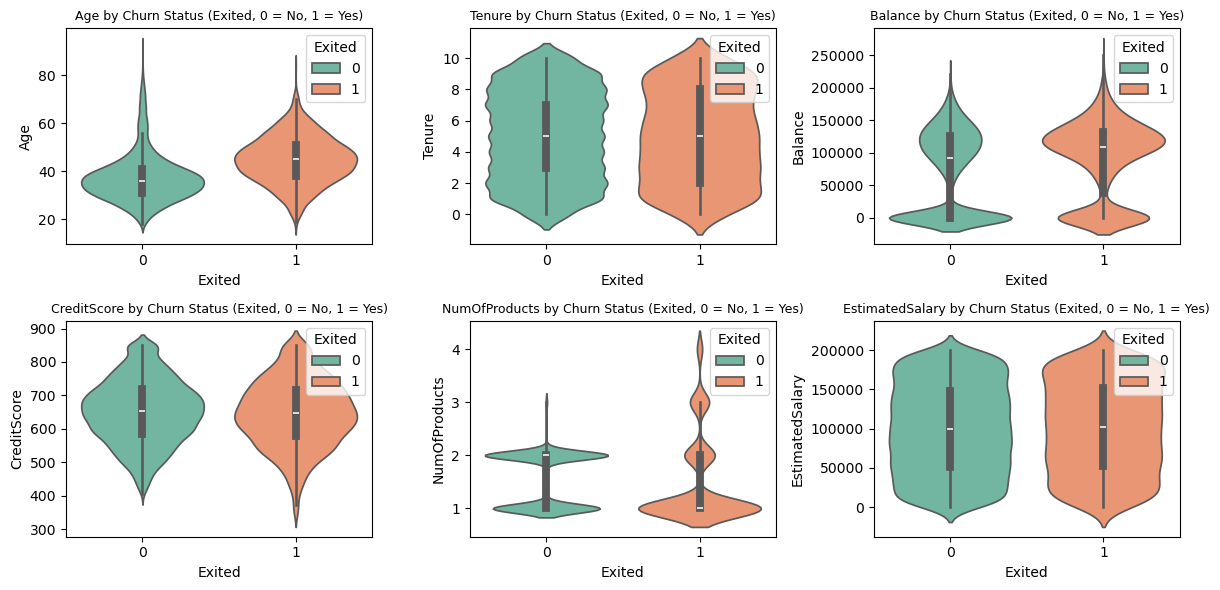

In [32]:
# We are using violin plots here as it is the most ideal visual for representing bimodal/multimodal data ('NumOfProducts' & 'Balance')- https://www.labxchange.org/library/items/lb:LabXchange:46f64d7a:html:1
# Setting up the subplot grid
plt.figure(figsize=(12, 3 * 2))

# Create violin plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Exited', y=column,hue='Exited', data=df, palette='Set2')
    plt.title(f'{column} by Churn Status (Exited, 0 = No, 1 = Yes)', fontsize = 9)
  
  
plt.tight_layout()
plt.show()

#### Notes: <br>
* <b>Age by Churn Status:</b> There is visible correlation between age of customers and the churn status, where the median age of customers who churned is higher than that of those who remained with the bank, suggesting that older customers have a higher tendency to churn.
* <b>Tenure by Churn Status: </b> The density of the tenure of the customers is similar between customers who exited and those who did not. Hence suggesting tenure is not likely to have a significant influence on the decision to leave.
* <b>Balance by Churn Status: </b> The median balance amount of customers who exited is higher than those who remained, where the balance amount of customers who churned is higher implying that clients who have a higher capital have a higher tendency to leave the bank. It will be worth exploring the reason behind such behaviour which can be useful in helping the bank work on customer retention strategies targeting at these customers.
* <b>Credit Score by Churn Status: </b> There is minimal difference in credit score by churn status, suggesting weak correlation strength.
* <b>Number of Products by Churn Status: </b> There is a vast difference in product ownership between those who exited and those who did not, where majority of those who stayed do not own more than 2 products. On the other hand, almost all of the customers who owned 3 or 4 products have exited. This could be an area for further exploration for the bank to further understand any underlying reasons behind such counterintuitive behaviour.
* <b>Estimated Salary by Churn Status: </b> There is minimal difference in the density of between the estimated salary of customers who exited and those who did not, thereby suggesting that estimated salary is not likely to be a significant influence on the decision to leave.

### One-hot Encoding of 'Geography' & 'Gender'
Before we proceed to plot the visualisation for to show correlation between the categorical fatures & the target, we have to conduct one-hot encoding on 'Geography' variable to split by the 3 nationalities - France, Germany, Spain. This will allow us to analyse the correlation between the different geographies of the customers (France/Germanay/Spain) & churn status.
We will also convert categorical data of 'Gender' to numerical format for ease of use in model training later. 

In [35]:
# Encoding of categorical variables - Geography

df = pd.get_dummies(df, columns=['Geography'])

In [36]:
# Encoding of categorical variables - Gender 

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,True,False,False,False
1,2,15647311,Hill,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,False,True,False
2,3,15619304,Onio,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,True,False,False,False
3,4,15701354,Boni,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,True,False,False,False
4,5,15737888,Mitchell,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,False,False,True,False


<b>Plotting visualisation for correlation between categorical features & target:</b>

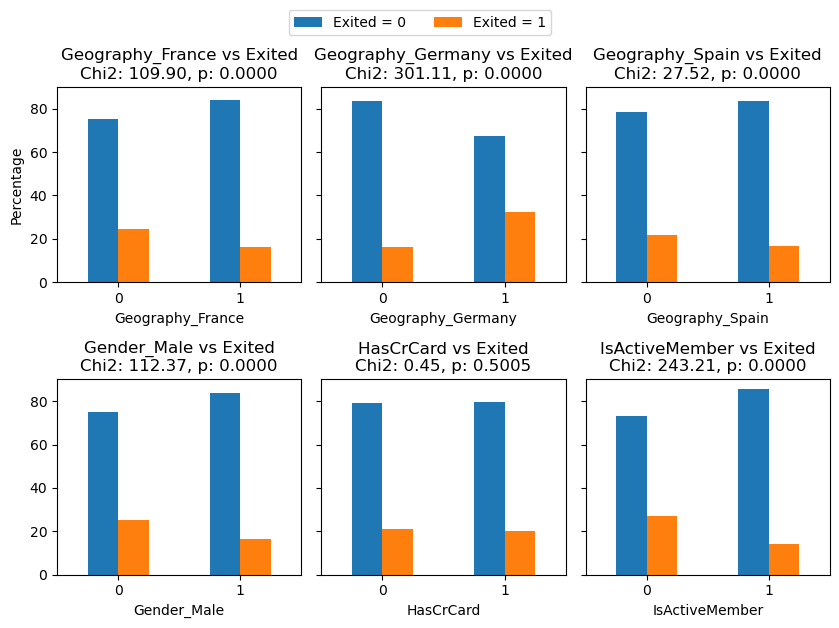

In [39]:
from scipy.stats import chi2_contingency

# List of categorical variables to analyze
categorical_vars = ['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'HasCrCard', 'IsActiveMember']
target = 'Exited'

# Create a subplot with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(8.5, 6), sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over the categorical variables
for i, var in enumerate(categorical_vars):
    # Create contingency table
    contingency_table = pd.crosstab(df[var], df[target])

    # Calculate Chi-Square statistic (optional, for correlation strength)
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Prepare data for bar chart
    percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    percentages.reset_index(inplace=True)

    # Plot grouped bar chart
    percentages.plot(
        kind='bar',
        x=var,
        stacked=False,
        ax=axes[i],
        color=['#1f77b4', '#ff7f0e'],  # Colors for target 0 and 1
        legend=False,
    )

    # Set title and labels
    axes[i].set_title(f"{var} vs {target}\nChi2: {chi2:.2f}, p: {p:.4f}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Percentage" if i == 0 else "")
    axes[i].set_xticklabels(["0", "1"], rotation=0)

# Add a legend for the target classes
fig.legend(
    labels=[f"{target} = 0", f"{target} = 1"],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=True,
)

# Adjust layout
plt.tight_layout()
plt.show()

<b>Notes: </b>
* <b>Geographic Profile ('Geography_France','Geography_Germany','Geography_Spain') : </b>
    * Customer's geographic profile is correlated to the churn status, depending on their geographic profile, there is a higher/lower tendency of churn. A quick visual comparison between customers from the 3 geographies show that customers from Germany show a lower tendency of churn, as opposed to the other 2 geographies. This suggest that country-specifc strategies might be necessary. 
    * More investigation could be done on customers from Germany to explore reasons why these customers have a lower churn rate.
    * The feature 'Geography_Germany' is a good predictor on churn status as seen in the high chi-squared score & low p-value.
          
* <b> Gender (Gender_Male, 0 = no, 1 = yes):</b> Male customers have a lower tendency to churn, as compared to female customers. 

* <b>Credit Card Ownership (HasCrCard, 0 = no, 1 = yes): </b> Whether the customer owns a credit card or not, does not have correlation with churn status, as shown in the high p-value and low chi-sqaure score. Hence, we do not have to worry about the imbalanced distribution which was spotted in earlier step.

* <b>Active/Inactive Member Status (IsActiveMember, 0 = no, 1 = yes): </b> There is evidence of a correlation between the variables here as seen in the high chi-squared score and low p-value. Active customers have a much lower tendecy to leave. The bank should consistently implement marketing campaigns to ensure customers are actively engaged.

### Handling Null Values

There are 3 null values spotted in the 3 columns - 'Age', 'HasCrCard' & 'IsActiveMember'. As the number is small (3 out ot 10,002 records, it is not likely to impact the overall model, hence suggest to drop these 3 records.

In [43]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Age                  1
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [44]:
# make a copy of the dataframe before dropping the columns
df_cleaned = df.copy()

# drop the rows with null values which are present in the 3 columns
df_cleaned.dropna(subset=['Age', 'HasCrCard', 'IsActiveMember'], inplace=True)

In [45]:
# confirming null values are removed - cross check that there should only be 9999 records
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 10001
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          9999 non-null   int64  
 1   CustomerId         9999 non-null   int64  
 2   Surname            9999 non-null   object 
 3   CreditScore        9999 non-null   int64  
 4   Age                9999 non-null   float64
 5   Tenure             9999 non-null   int64  
 6   Balance            9999 non-null   float64
 7   NumOfProducts      9999 non-null   int64  
 8   HasCrCard          9999 non-null   float64
 9   IsActiveMember     9999 non-null   float64
 10  EstimatedSalary    9999 non-null   float64
 11  Exited             9999 non-null   int64  
 12  Geography_France   9999 non-null   bool   
 13  Geography_Germany  9999 non-null   bool   
 14  Geography_Spain    9999 non-null   bool   
 15  Gender_Male        9999 non-null   bool   
dtypes: bool(4), float64(5), int6

### Redundant columns 
As mentioned above, the information in the first 3 columns of the dataset do not seem to contain useful information that are relevant to this project. Therefore, we should drop them.

In [47]:
# drop redundent column - RowNumber, CustomerId & Surname
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_cleaned.drop( columns = columns_to_drop,inplace=True)
df_cleaned.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,True,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,True,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,True,False,False,False
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,False,True,True


In [48]:
# checking final shape after data cleaning
df_cleaned.shape

(9999, 13)

Now, the cleaned dataset now consists of 13 columns & 9999 records.

### Scaling
As the numerical variables in this dataset have a wide & varying range (eg. 'Age' - 0 to 10 yrs; 'Balance' - 0 to 250898), scaling is needed to  bring all numerical features to a comparable scale. This will help improve model performance by ensuring equal weight of the features. Here, we will apply Robust Scaling method to the dataset.

In [52]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [53]:
# Apply RobustScaler to the dataset
scaled_data = scaler.fit_transform(df_cleaned)

# Convert the scaled data back to a DataFrame for easy viewing
scaled_df = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

print(scaled_df)

      CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0       -0.246269  0.416667   -0.75 -0.761185            0.0        0.0   
1       -0.328358  0.333333   -1.00 -0.104591            0.0       -1.0   
2       -1.119403  0.416667    0.75  0.489679            2.0        0.0   
3        0.350746  0.166667   -1.00 -0.761185            1.0       -1.0   
4       -0.052239  0.583333    0.75  0.130036            1.0        0.0   
...           ...       ...     ...       ...            ...        ...   
9994     0.425373 -0.083333    0.50 -0.761185            0.0       -1.0   
9995     0.895522  0.416667   -0.50 -0.173007            1.0        0.0   
9996     0.895522  0.416667   -0.50 -0.173007            1.0        0.0   
9997     1.044776 -0.750000   -0.25  0.258420            0.0        0.0   
9998     1.044776 -0.750000   -0.25  0.258420            0.0        0.0   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                0.0         0.0

### Feature Selection

In [55]:
X = scaled_df.drop('Exited', axis = 1) # taking all columns as input except the target
y = scaled_df['Exited'] # taking only target

### Train-Test Split

In [57]:
# import library
from sklearn.model_selection import train_test_split

# Splitting the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Create a copy of the training set for SMOTE experimentation later
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

### Handling Class Imbalance -- apply SMOTE to training data

As we have class imbalance in our dataset, we will implement SMOTE (Synthetic Minority Over-sampling Technique) to the training data. This technique generates synthetic samples for the minority class and balances the class distribution. 

In [60]:
# Check the class distribution of the original training set
print("Original training set class distribution:")
print(y_train.value_counts())

Original training set class distribution:
Exited
0.0    6350
1.0    1649
Name: count, dtype: int64


In [61]:
# Now we will apply SMOTE to the training data (X_train_copy and y_train_copy) 
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_copy, y_train_copy)

# Check the new class distribution after applying SMOTE
print("\nResampled training set class distribution (after SMOTE):")
print(pd.Series(y_train_resampled).value_counts())


Resampled training set class distribution (after SMOTE):
Exited
0.0    6350
1.0    6350
Name: count, dtype: int64


After SMOTE, there is now an equal split in the class distribution in the resampled training set (X_train_resampled, y_train_resampled). We are now ready to train the model.

### Training & Model Performance Evaluation
The following models will be used for model training:
+ XGBoost
+ Decision tree
+ Logistic Regression

For model performance evaluation, given the business objective and characteristics of our dataset, the following metrics will be used:
+ Negative Predictive Value (NPV)
+ Recall (Sensitivity)
+ F1-score 
+ Confusion Matrix Analysis

Reasons for the above selection of metrics:
+ Class balance - Due to the imbalanced class, we do not use Accuracy for evaluation as it will be misleading. Metrics such as Recall & F1 score are sensitive to class imbalance.
+ Business objective (>> Recall) - The objective of this study is to predict a positive (client who churn), and for the bank to engage the customer in a series of retention campaigns to influence the customer to stay with the bank. Therefore, a false negative (failure to predict a positive ie. missing out on predicting an actual customer churn) will be costly to the bank. This will cause the bank to miss the opportunity to engage the customer in retention campaigns.
+ A balance in false positive & false negative (>> F1 score) - Given the business objective, it is important to maintain a balance between false positive & false negative where an over estimation of either can lead to consequences for the bank.
+ Accuracy in prediction of negative classes (>> NPV) - Accurate prediction of customer who will stay is important here as it will be countereffective if a customer is put through a campaign that may not be relevant to them. It may turn customers away instead. 


In [117]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#### XGBoost

In [66]:
# install xgboost package
!pip install xgboost
from xgboost import XGBClassifier

In [134]:
# train the XGBoost model
xgb_model = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss'
)  
xgb_model.fit(X_train_resampled, y_train_resampled)  # Train the model on resampled data
xgb_pred = xgb_model.predict(X_test)

XGBoost Negative Predictive Value (NPV): 0.90
XGBoost F1-Score: 0.5973333333333334
XGBoost Sensitivity (Recall): 0.5758354755784062


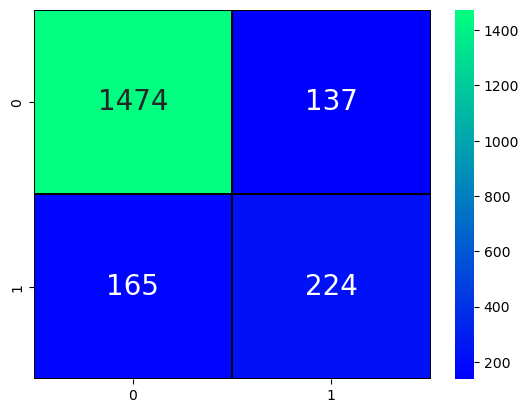

In [136]:
# evaluating the model - Confusion matrix
cm=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20},fmt='g');

# evaluating the model - NPV, sensitivity & f1 score
tn, fp, fn, tp = confusion_matrix(y_test, xgb_pred).ravel()
npv = tn / (tn + fn)
print(f"XGBoost Negative Predictive Value (NPV): {npv:.2f}")

f1_xgb = f1_score(y_test, xgb_pred)
print(f"XGBoost F1-Score: {f1_xgb}")

# precision_xgb = precision_score(y_test, xgb_pred, pos_label=1)  # Assuming class 1 is the positive class
# print(f"XGBoost Precision (Positive Predictive Value): {precision_xgb:}")

sensitivity_xgb = recall_score(y_test, xgb_pred, pos_label=1)  # Assuming class 1 is the positive class
print(f"XGBoost Sensitivity (Recall): {sensitivity_xgb}")

#### Decision Tree

In [69]:
# import the model
from sklearn.tree import DecisionTreeClassifier

In [70]:
# train the Decision Tree model
dtree = DecisionTreeClassifier()

dtree.fit(X_train_resampled, y_train_resampled)

dtreePred = dtree.predict(X_test)

Decision Tree Negative Predictive Value (NPV): 0.89
Decision Tree F1-Score: 0.49551569506726456
Decision Tree Sensitivity (Recall): 0.5681233933161953


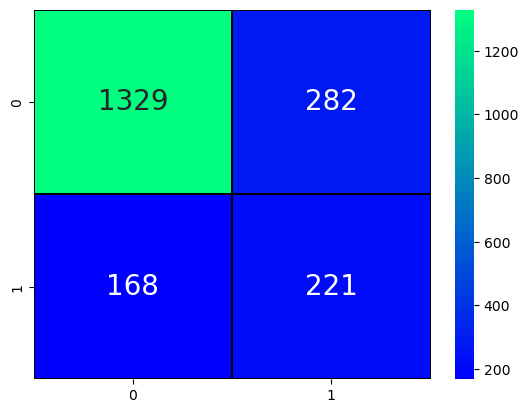

In [129]:
# evaluating the model - Confusion matrix
cm=confusion_matrix(y_test,dtreePred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20},fmt='g');

# evaluating the model - NPV, sensitivity & f1 score
tn, fp, fn, tp = confusion_matrix(y_test, dtreePred).ravel()
npv = tn / (tn + fn)
print(f"Decision Tree Negative Predictive Value (NPV): {npv:.2f}")

f1_dtree = f1_score(y_test, dtreePred)
print(f"Decision Tree F1-Score: {f1_dtree}")

# precision_dtree = precision_score(y_test, dtreePred, pos_label=1)  # Assuming class 1 is the positive class
# print(f"Decision Tree Precision (Positive Predictive Value): {precision_dtree:}")

sensitivity_dtree = recall_score(y_test, dtreePred, pos_label=1)  # Assuming class 1 is the positive class
print(f"Decision Tree Sensitivity (Recall): {sensitivity_dtree}")

#### Logistic Regression

In [73]:
# Import the model
from sklearn.linear_model import LogisticRegression  

In [74]:
# train the logistic regression model

log = LogisticRegression()

log.fit(X_train_resampled, y_train_resampled)

lr_Pred = log.predict(X_test)

Logistic Regression Negative Predictive Value (NPV): 0.92
Logistic Regression F1-Score: 0.5008880994671403
Logistic Regression Sensitivity (Recall): 0.7249357326478149


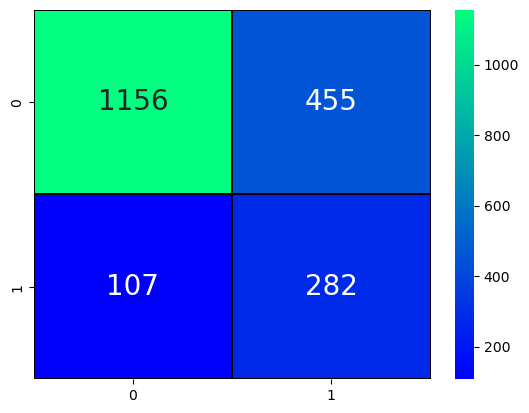

In [131]:
# evaluating the model - confusion matrix
cm=confusion_matrix(y_test,lr_Pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20},fmt='g');

# evaluating the model - precision, sensitivity & f1 score
tn, fp, fn, tp = confusion_matrix(y_test, lr_Pred).ravel()
npv = tn / (tn + fn)
print(f"Logistic Regression Negative Predictive Value (NPV): {npv:.2f}")

f1_lr = f1_score(y_test, lr_Pred)
print(f"Logistic Regression F1-Score: {f1_lr}")

# precision_lr = precision_score(y_test, lr_Pred, pos_label=1)  # Assuming class 1 is the positive class
# print(f"Logistic Regression Precision (Positive Predictive Value): {precision_lr:}")

sensitivity_lr = recall_score(y_test, lr_Pred, pos_label=1)  # Assuming class 1 is the positive class
print(f"Logistic Regression Sensitivity (Recall): {sensitivity_lr}")


#### Evaluation Comparision

In [143]:
### to include PrettyTable code
!pip install prettytable
from prettytable import PrettyTable

In [147]:
# Create table object
table = PrettyTable()

# Define column headers (including row header)
table.field_names = ["Model", "NPV", "F1_score", "Sensitivity (Recall)"]

table.add_row(["XGBoost", 0.90, 0.5973333333333334, 0.5758354755784062])
table.add_row(["Decision Tree", 0.89, 0.49551569506726456, 0.5681233933161953])
table.add_row(["Logistic Regression", 0.92, 0.5008880994671403, 0.7249357326478149])

# Print the table
print(f"Performance Metrics Comparison:")
print(table)

Performance Metrics Comparison:
+---------------------+------+---------------------+----------------------+
|        Model        | NPV  |       F1_score      | Sensitivity (Recall) |
+---------------------+------+---------------------+----------------------+
|       XGBoost       | 0.9  |  0.5973333333333334 |  0.5758354755784062  |
|    Decision Tree    | 0.89 | 0.49551569506726456 |  0.5681233933161953  |
| Logistic Regression | 0.92 |  0.5008880994671403 |  0.7249357326478149  |
+---------------------+------+---------------------+----------------------+


Logistic Regression model is the best performing model as shown in the following: 
+ Strong NPV (0.92): Best at identifying true negatives.+ 
High Sensitivity (0.7249): Best at identifying true positives, crucial for imbalanced datasets
+ 
Moderate F1-Score (0.5009): Lower than XGBoost but competitive overall.


#### Key Takeaways & Recommendations:

- Customised targeted campaigns by age group & country
    - Majority of younger customers tend to remain with the bank, but older customers show an increased tendency to leave
    - Differences in churn rates in different countries ( Lowest churn rate rate in Germany)
- Further investigation product ownership behaviour
    - Low retention rate for customers who own 3 or more products
    - Additional customer survey to look into possible reasons for underperforming products/service offerings
    - Additional analysis into type of product owned (Wealth/Investment-related products? Loans?)  >> provide insights into banking needs or any gaps in current offerings
- Aggressive new customer acquisition campaign
    - Sharp dip in number of customers with tenure of 10 years & 0 years. This implies that there are fewer new customers in the last 1 year and a dip in number of older customers.
    - Investigate reasons for low onboarding of new customers in the past year. Is it Geography specific?
- Investigate correlation between ‘Balance’ & ‘IsActiveMember’
    - Sizeable portion of the bank's customers hold zero balance in their accounts.
    - Additional analysis to look into the correlation between balance amount and active/inactive member status to see if customers are purely using the account as a holding transactional account.
    - Perhaps consider implement retention campaigns to encourage more engagements and to turn them into active members, thereby increasing retention rate. 



#### Learning & Areas for Further Analysis:

<b>Not all imbalanced features need intervention </b>
+ Detected imbalanced features in dataset
+ Rebalancing methods

<b>Unclear definition of ‘IsActiveMember’ & ‘Balance’ parameter</b>
+ ‘IsActiveMember’ – unclear how ‘active’ is measured >> # interactions with bank? # of active transactions of bank account?
+ Useful to further analyse correlation with other paraments such as Balance to draw deeper insights.
+ ‘Balance’ – unclear if balance is derived from multiple accounts or account with highest balance. >> multiple accounts may provide insights on customer’s churn rate

<b>Success factors in Germany? </b>
+ Further investigation into factors contributing to lower churn rate among German customers is recommended
+ Macroeconomic factors: e.g. Country-specific conditions (less competitive consumer banking landscape), consumer behaviour difference
+ Successful local customer retention campaigns

<b>More time for further analysis </b>
+ Further deep dive into details (e.g. testing correlation between 2 independent variables) in order to better suggest a detailed tactical plan 



